In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from scipy import stats
from scipy.stats import norm

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

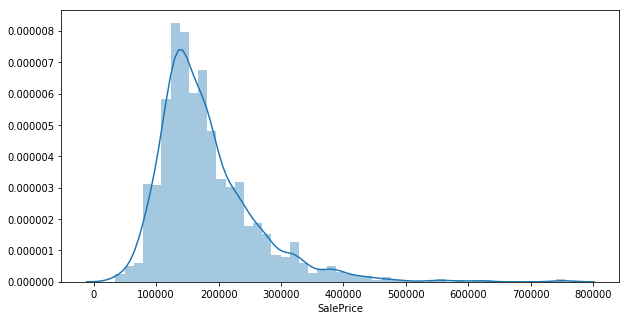

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'])
plt.show()

The price is right skewed.

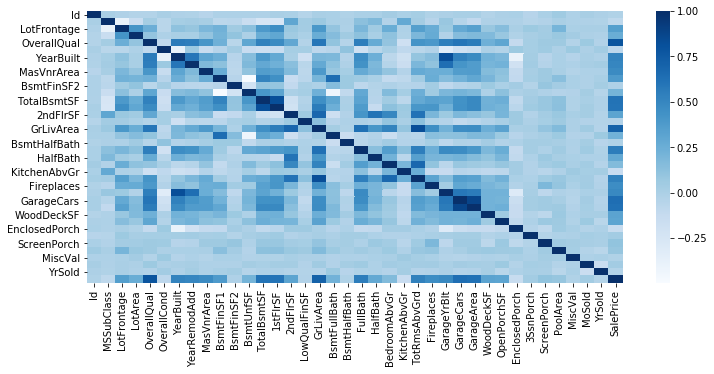

In [9]:
plt.figure(figsize=(12,5))
corrmat = train.corr()
sns.heatmap(corrmat,cmap='Blues')
plt.show()

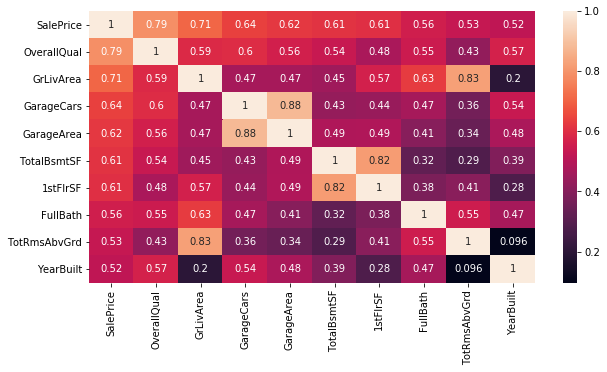

In [10]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(10,5))
hm = sns.heatmap(cm, annot=True,yticklabels=cols.values, xticklabels=cols.values)
plt.show()

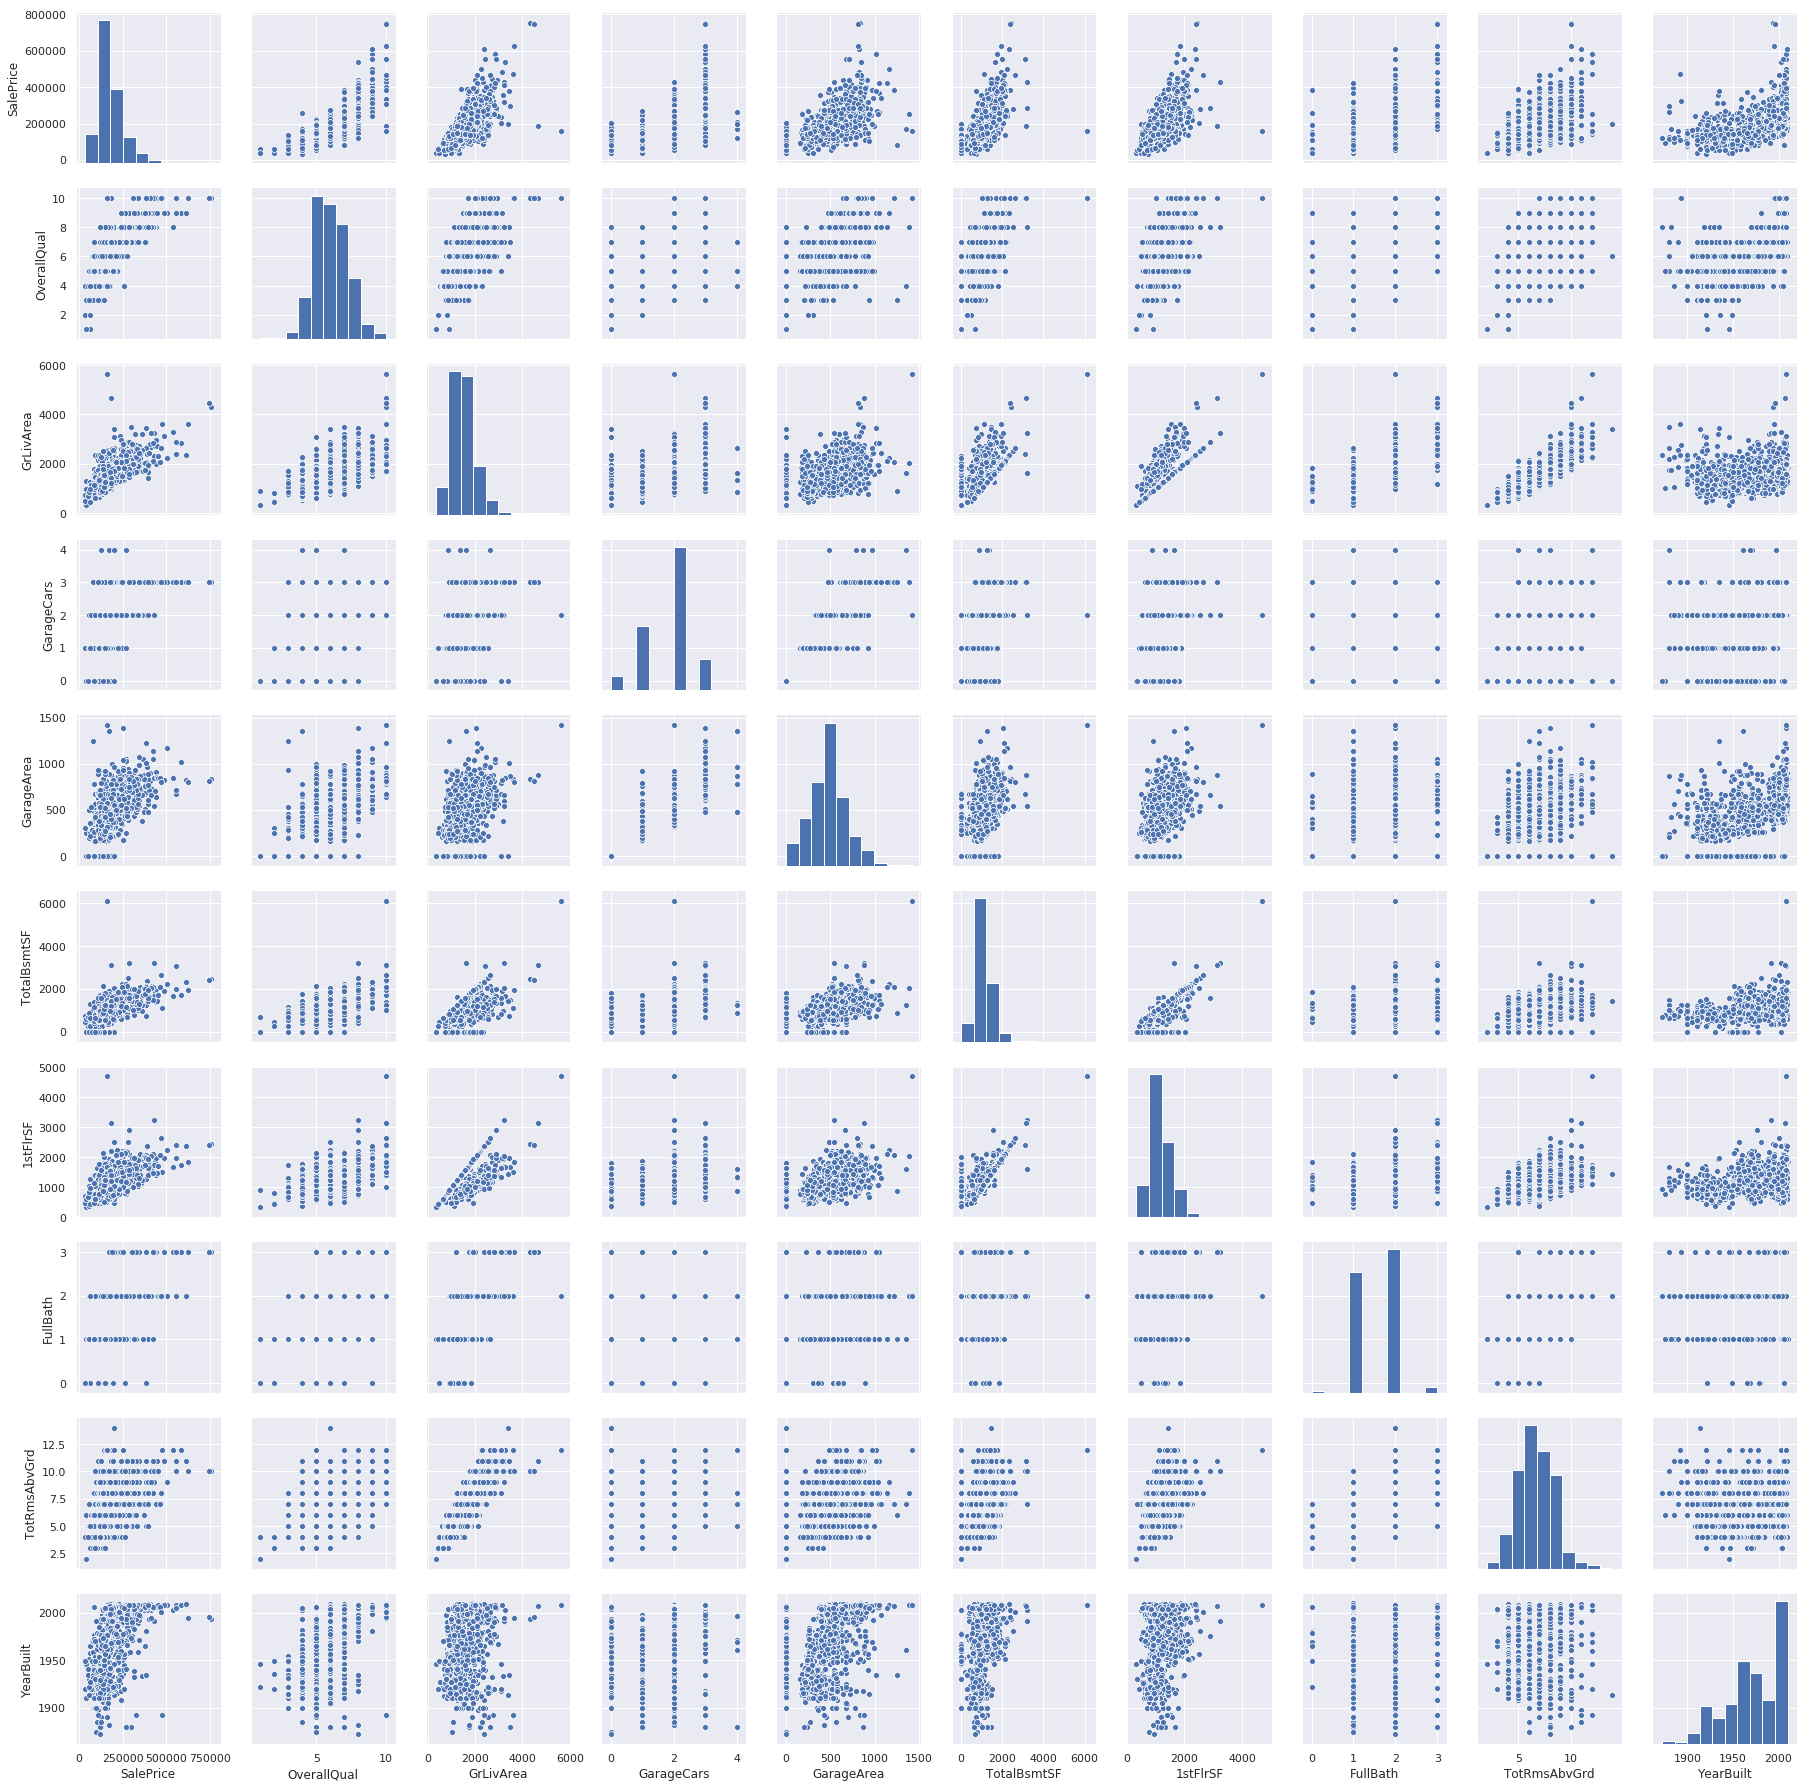

In [11]:
sns.set()
sns.pairplot(data=train,vars=cols)
plt.show()

In [12]:
miss_per=train.isna().sum()/train.isna().count()*100
miss_per = miss_per.sort_values(ascending=False).head(20)
df_miss_per=pd.DataFrame(miss_per.values,index=miss_per.index,columns=['Total_percentage'])

In [13]:
df_miss_per

,Total_percentage
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageCond,5.547945
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


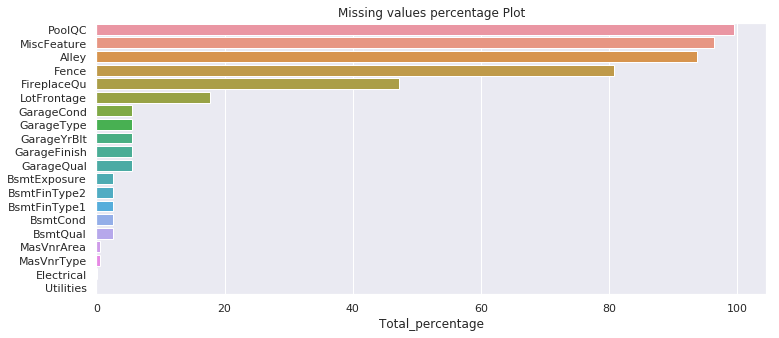

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_miss_per['Total_percentage'],y=df_miss_per.index)
plt.title('Missing values percentage Plot')
plt.show()

As the missing percentage of the below 5 features is  greater than the 20% so I have decided to drop those Features.
PoolQC	99.520548
MiscFeature	96.301370
Alley	93.767123
Fence	80.753425
FireplaceQu	47.260274


In [15]:
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace= True)

In [16]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

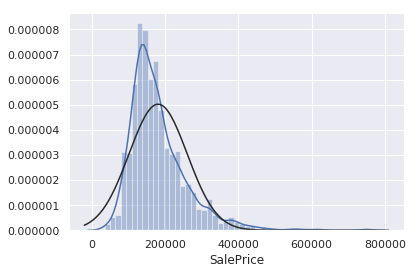

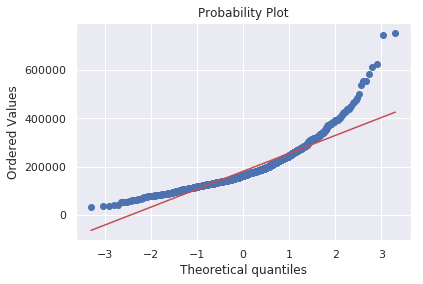

In [17]:
sns.distplot(train['SalePrice'],fit=norm)
plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

In [18]:
#dropping these extreme values
train=train.drop(axis=0,index=train.index[691])
train=train.drop(axis=0,index = train.index[1182])
train=train.drop(axis=0,index=train.index[495])
train=train.drop(axis=0,index = train.index[916])

((array([-3.30437073, -3.04710795, -2.90403844, ...,  2.90403844,
          3.04710795,  3.30437073]),
  array([10.47194981, 10.54270639, 10.5789798 , ..., 13.32392695,
         13.34550693, 13.5211395 ])),
 (0.3948320098305392, 12.024068906256087, 0.9961178776119722))

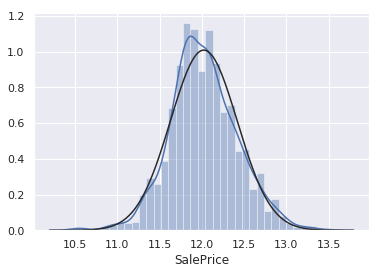

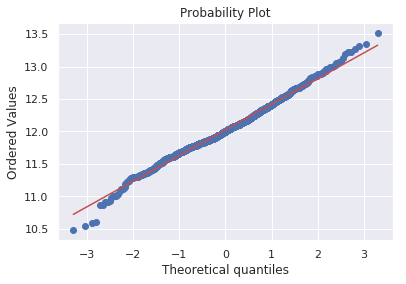

In [19]:
sns.distplot(np.log(train['SalePrice']),fit=norm)
plt.figure()
stats.probplot(np.log(train['SalePrice']),plot=plt)

In [20]:
train['SalePrice'] = np.log(train['SalePrice'])


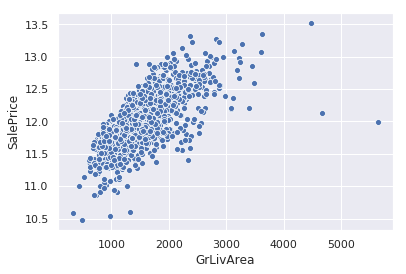

In [21]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])
plt.show()

In [22]:
train.drop(train[train['GrLivArea']>4000].index,axis=0,inplace=True)

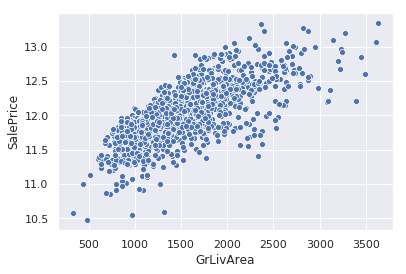

In [23]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])
plt.show()

In [24]:
print(corrmat['SalePrice'].sort_values(ascending=False)[:15])
corrmat['SalePrice'].sort_values(ascending=False)[-5:]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [25]:
features=list(corrmat['SalePrice'].sort_values(ascending=False)[:15].index)\
+list(corrmat['SalePrice'].sort_values(ascending=False)[-5:].index)
features.remove('SalePrice')

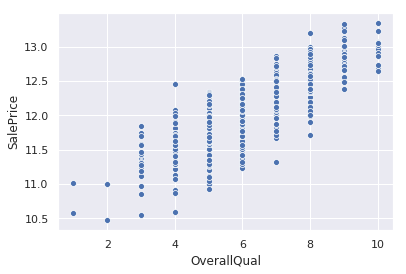

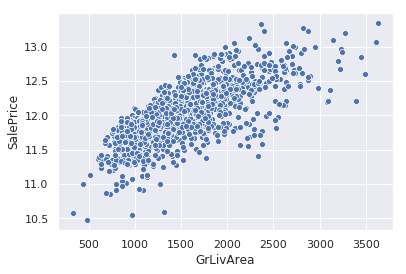

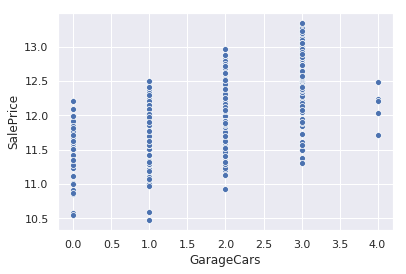

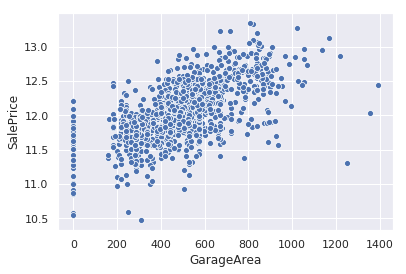

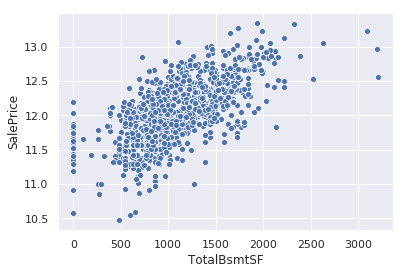

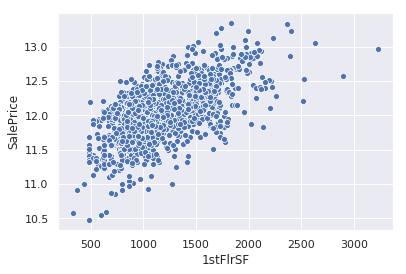

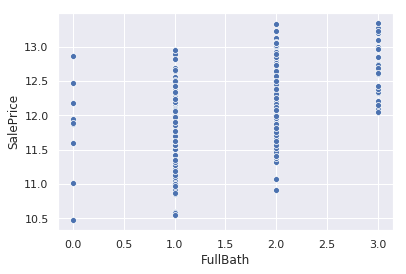

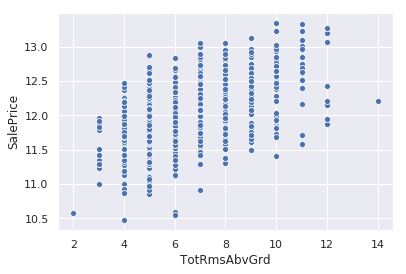

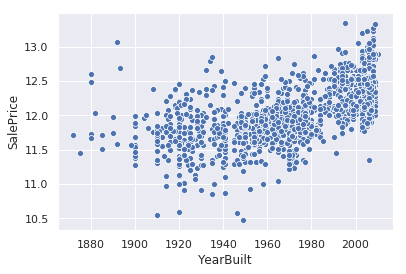

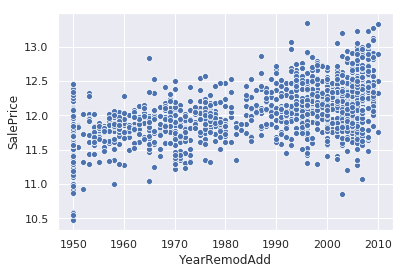

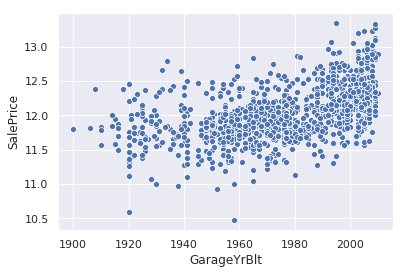

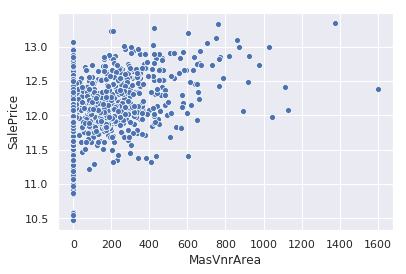

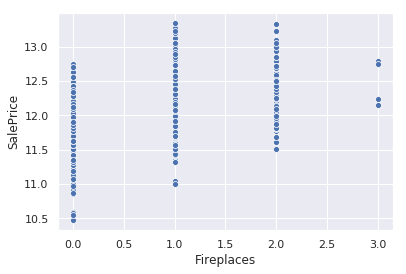

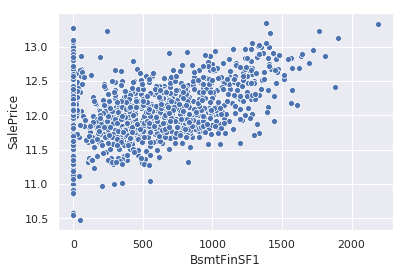

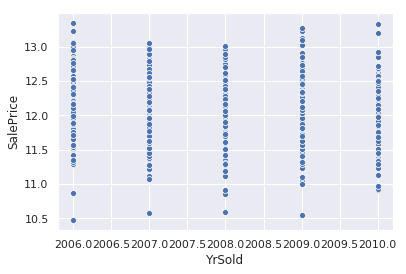

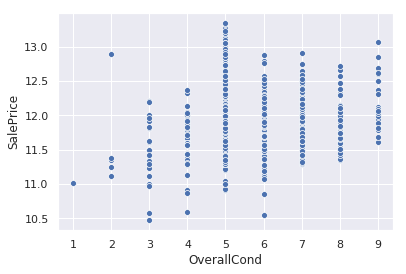

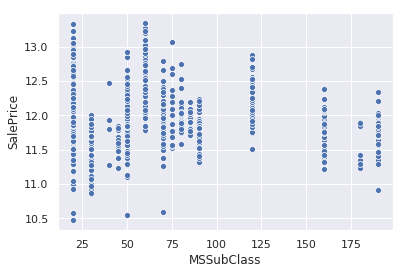

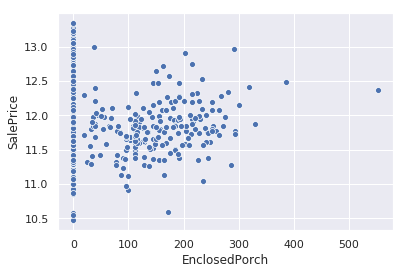

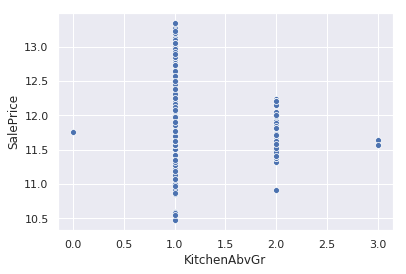

In [26]:
for col in features:
    sns.scatterplot(train[col],train['SalePrice'])
    plt.show()

In [27]:
train=train.drop(train[train['MasVnrArea']>1200].index,axis=0)
train=train.drop(train[train['BsmtFinSF1']>2000].index,axis=0)
train=train.drop(train[train['LowQualFinSF']>530].index,axis=0)
train=train.drop(train[(train['MSSubClass']<25) &(train['SalePrice']<11)].index,axis=0)

Dropping some of the extreme data points

In [28]:
train[features].head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
0,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,2008,5,60,0,1
1,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,2007,8,20,0,1
2,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,2008,5,60,0,1
3,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,2006,5,70,272,1
4,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,2008,5,60,0,1


In [29]:
cat_features=train.select_dtypes(include=['object']).columns
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

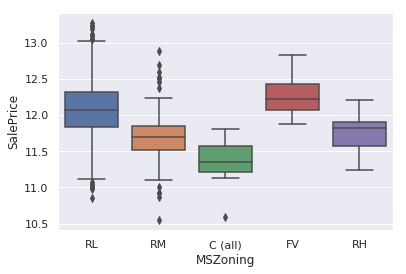

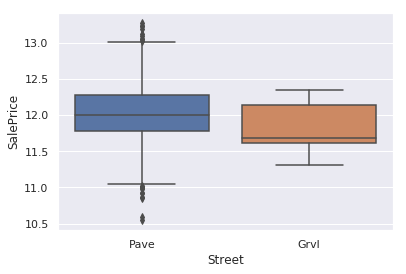

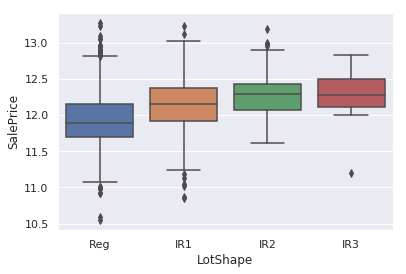

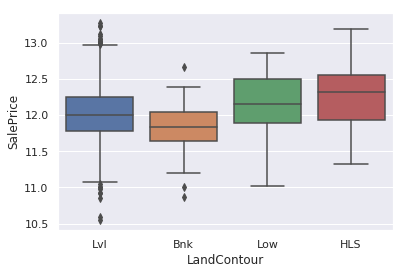

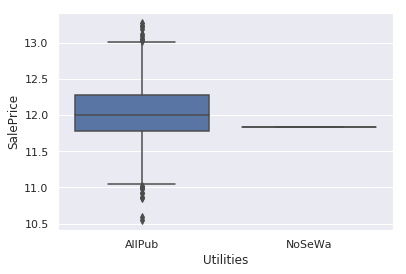

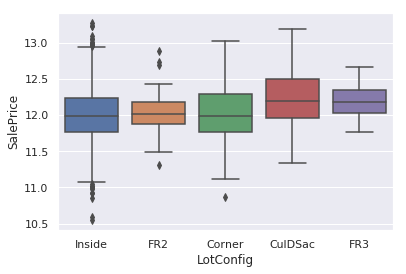

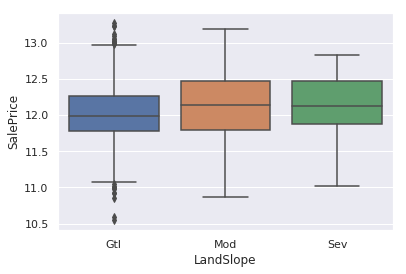

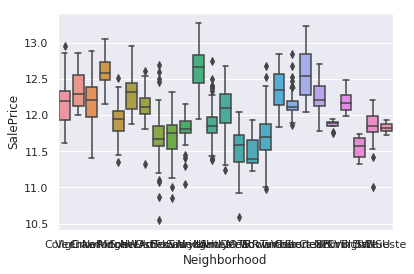

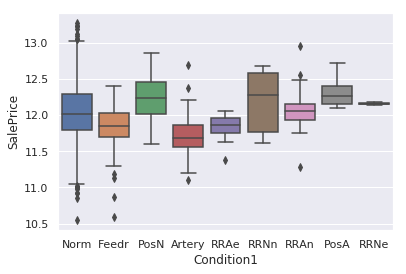

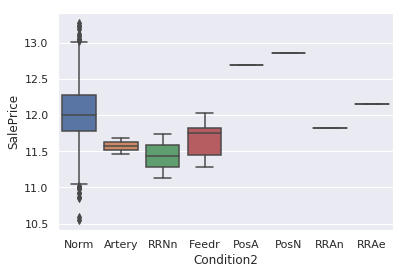

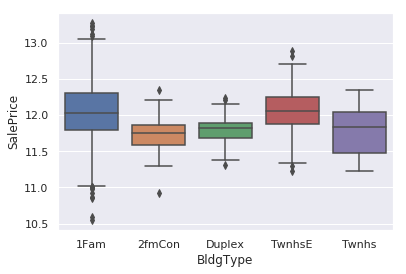

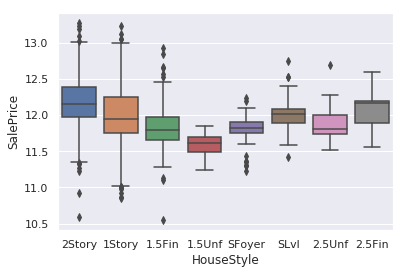

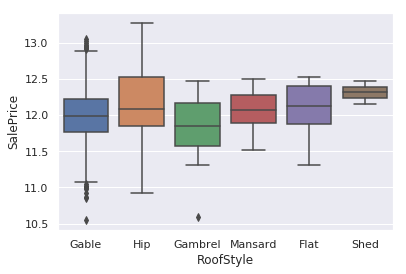

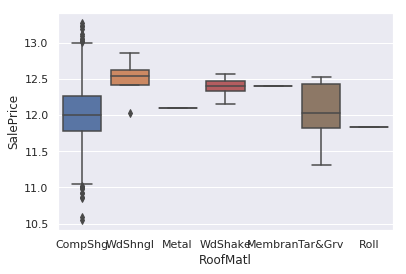

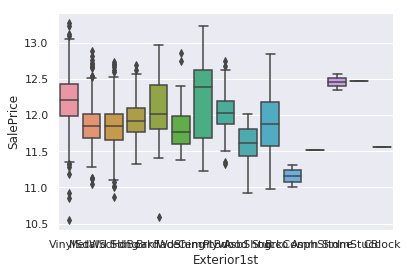

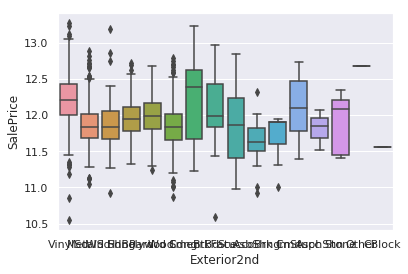

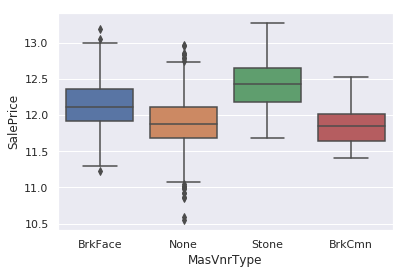

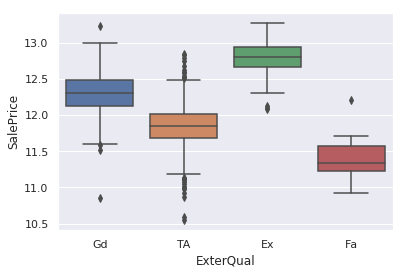

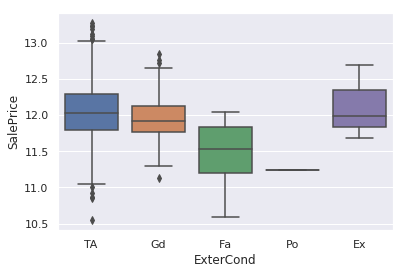

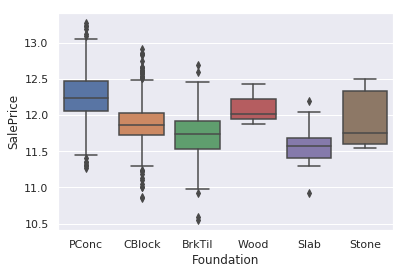

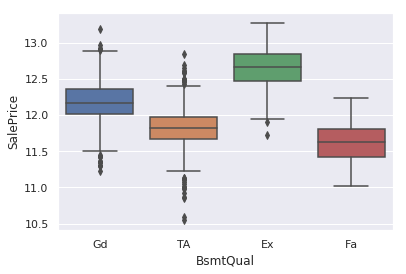

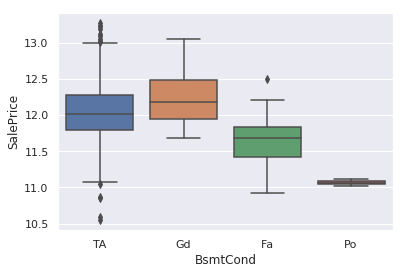

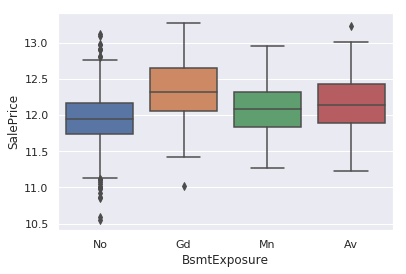

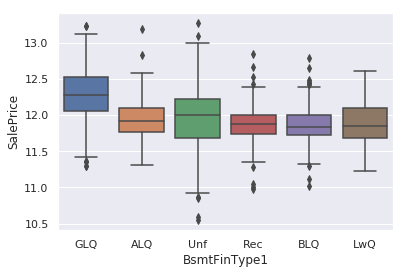

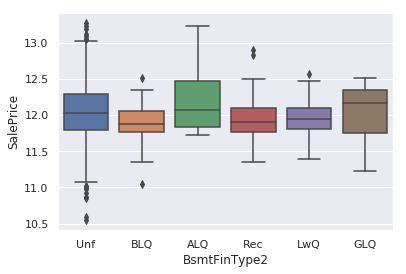

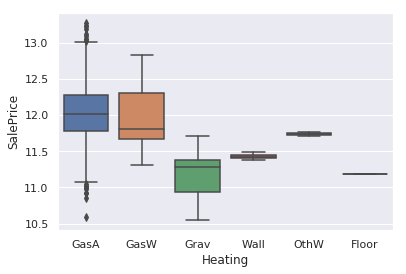

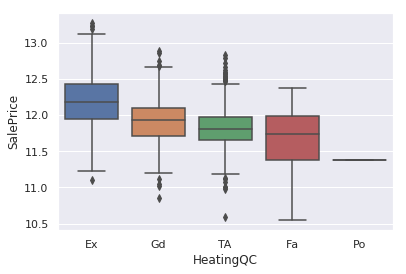

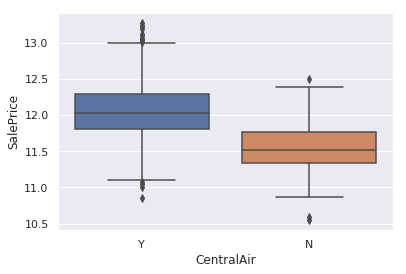

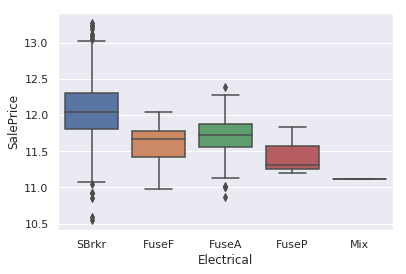

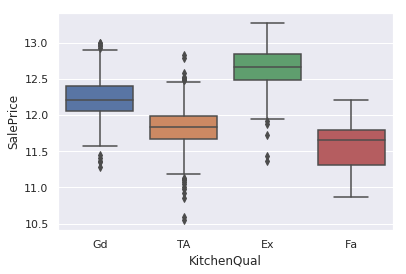

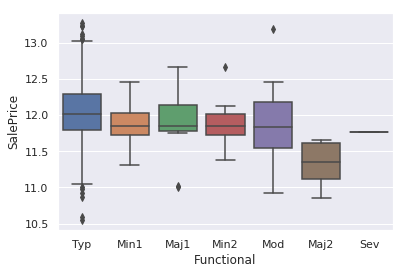

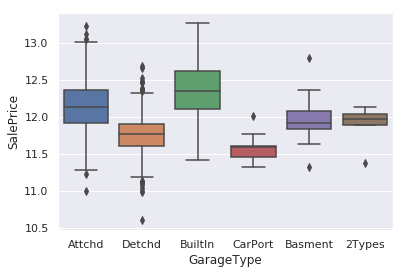

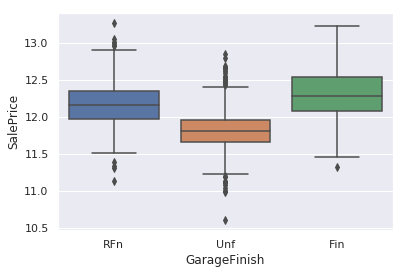

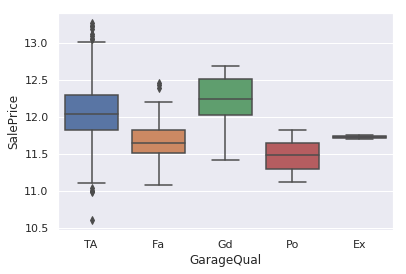

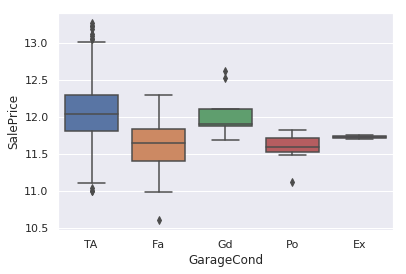

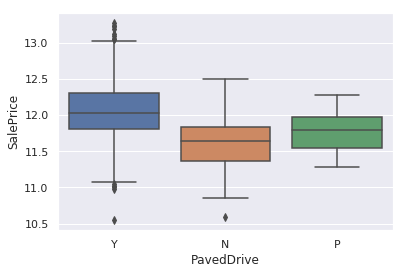

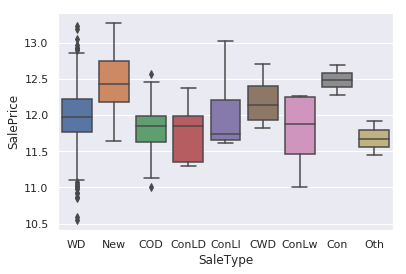

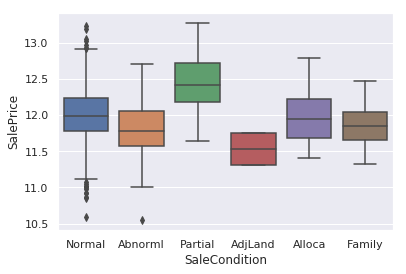

In [30]:
for col in cat_features:
    sns.boxplot(x=train[col],y=train['SalePrice'])
    plt.show()

In [31]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
train['Utilities']=train['Utilities'].fillna(train['Utilities'].mode()[0])

In [32]:
train_1 = train.copy()

I have considered the Top 5 Categories in each Categorical Features

In [33]:
for col in cat_features:
    
    fea_du=train[col].value_counts().head(5)
    k=fea_du.index[:5]
    for cat in k:
        name= col+'_'+cat
        train_1[name] =(train_1[col]==cat).astype(int)
    del train_1[col]
    print(col)
    

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [34]:
train_1.head()
cat_features_train_1=train_1.columns     

In [35]:
corr=train_1.corr()
feature_select=list(corr['SalePrice'].sort_values(ascending=False)[:30].index)\
+list(corr['SalePrice'].sort_values(ascending=True)[:20].index)
feature_select.remove('SalePrice')

In [36]:
X = train_1[feature_select]
y = train_1['SalePrice']

In [37]:
from sklearn.preprocessing import StandardScaler,RobustScaler,normalize,MinMaxScaler
sc_x= StandardScaler()
X_1=sc_x.fit_transform(X)
df_scaled=pd.DataFrame(X_1,columns=X.columns)

In [38]:
np.mean(X_1),np.std(X_1)

(-6.132284457014441e-17, 1.0)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X_1)
principalDf = pd.DataFrame(data = principalComponents,columns=X.columns[:30])

In [40]:
principalDf.shape

(1446, 30)

In [41]:
pca.explained_variance_ratio_.sum()

0.9256787946421551

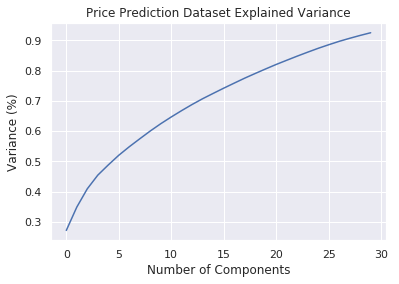

In [42]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Price Prediction Dataset Explained Variance')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import statsmodels.api as sm

In [44]:
X = principalDf
y = train_1['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8740174858519622
0.8784708711564195


In [45]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

0.13459947479854514

In [46]:
model1 = SGDRegressor()
model1.fit(X_train,y_train)
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.8730205925987553
0.8754522467302306


In [47]:
model2 = Ridge(alpha=111,fit_intercept=True)
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.8736548321057522
0.8787719872910745


In [48]:
dt = DecisionTreeRegressor(max_depth=21,min_samples_split=92,criterion='mse')
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.8557676153632037
0.7528460470570556


In [49]:
#rf = RandomForestRegressor(n_estimators=41,max_depth=32,warm_start=True)
rf = RandomForestRegressor(n_estimators=1000,min_samples_split=30,min_samples_leaf=5,random_state=42,warm_start=True)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9120955445765859
0.8612373474517349


In [50]:
bg = BaggingRegressor(base_estimator=rf,n_estimators=41)
bg.fit(X_train,y_train)
print(bg.score(X_train,y_train))
print(bg.score(X_test,y_test))

0.8845025500148138
0.8581111820711864


In [51]:
la = Lasso(alpha=0.001)
la.fit(X_train,y_train)
print(la.score(X_train,y_train))
print(la.score(X_test,y_test))

0.8738080583260192
0.8786001551618423


In [52]:
xgb = XGBRegressor(reg_alpha=0.1,reg_lambda=1)
xgb.fit(X_train,y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

[15:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



0.9313772160873789
0.8689517207246513


In [53]:
test.isna().sum().sort_values(ascending=False)[:40]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
MSSubClass         0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64

In [54]:
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace= True)

In [55]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].median())
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['BsmtFinSF2'] =test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath'] =test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [56]:
test.isna().sum().sort_values(ascending=False)[:40].head()

SaleCondition    0
YearBuilt        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64

In [57]:
test_1 = test.copy()

In [58]:
for col in cat_features:
    
    fea_du_test=test[col].value_counts().head(5)
    k=fea_du_test.index[:5]
    for cat in k:
        name= col+'_'+cat
        test_1[name] =(test_1[col]==cat).astype(int)
    del test_1[col]
    print(col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [59]:
test_1.shape

(1459, 199)

In [60]:
test_1=test_1[feature_select]

In [61]:
sc_test= StandardScaler()
df_test=sc_x.fit_transform(test_1)
df_scaled_test=pd.DataFrame(df_test,columns=test_1.columns)

In [62]:
df_scaled_test.head(1)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,...,BsmtExposure_No,LotShape_Reg,PavedDrive_N,Foundation_BrkTil,Neighborhood_OldTown,Neighborhood_Edwards,Electrical_FuseA,SaleType_WD,KitchenQual_Fa,Exterior1st_Wd Sdng
0,-0.751101,-1.215588,-0.988189,1.185921,-0.370716,-0.654561,-0.340945,-1.02872,-1.072885,-0.910121,...,0.682885,0.749732,-0.307447,-0.357088,-0.307447,-0.26242,-0.26242,0.398568,-0.147339,-0.404323


In [63]:
pc = PCA(n_components=30)
pca = pc.fit_transform(df_test)
principalDf_test = pd.DataFrame(data = pca,columns=X.columns[:30])

In [64]:
principalDf_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,...,KitchenQual_Ex,BsmtFinSF1,ExterQual_Ex,Exterior2nd_VinylSd,Exterior1st_VinylSd,OpenPorchSF,BsmtQual_Gd,SaleType_New,LotFrontage,ExterQual_TA
0,-2.996753,0.143234,-1.800195,0.614147,1.274765,-0.240562,1.105851,2.227950,1.496728,0.050988,...,0.840128,-0.362726,-0.237113,0.113240,-0.224014,0.369920,0.225131,0.468755,0.415454,0.119926
1,-2.291899,1.771648,-1.378331,-0.747314,-0.497650,0.677446,-2.520857,0.502168,-0.521792,-0.007104,...,0.742867,-2.308761,0.722106,0.784576,-0.184721,-0.350765,-0.769214,0.271981,0.366219,-0.081709
2,1.657031,-1.128515,-1.534261,0.109691,0.270805,0.357256,3.189817,-1.078326,0.773719,-0.887276,...,-0.209124,-0.737741,0.338970,1.201851,-0.038250,0.078220,-0.336990,-0.153173,-0.442928,-0.405249
3,2.447415,-0.924671,-0.554140,-0.615443,-0.090244,0.297963,1.749342,1.038089,-0.907191,0.108405,...,-0.149916,-0.993584,1.586808,0.848394,0.578643,-1.035233,0.231704,-0.790014,-0.495893,0.488421
4,2.275039,-2.409844,-0.641056,-0.361467,-0.647787,-0.410024,-1.451239,-1.434368,-0.826100,-0.910982,...,-0.554273,-0.541232,-0.786053,-0.001074,-0.176465,-0.055141,0.686780,0.276862,0.319612,0.521598


In [65]:
y_predictions=la.predict(principalDf_test)
predictions=np.expm1(y_predictions)

In [66]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predictions
    })
submission.to_csv('submission.csv', index=False)